### Exploratory Data Analysis

In [74]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [75]:
hb = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/hotel_bookings.csv")

In [3]:
hb.shape

(119390, 32)

In [4]:
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [5]:
hb.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [76]:
hb.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
hb.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
hb.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,10/21/2015
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [11]:
hb.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40240,City Hotel,0,103,2015,July,29,18,2,1,2,...,No Deposit,17.0,NaN,0,Transient-Party,94.50,0,0,Check-Out,7/21/2015
51778,City Hotel,0,169,2016,May,22,25,0,4,2,...,No Deposit,9.0,NaN,0,Transient-Party,123.25,0,0,Check-Out,5/29/2016
103416,City Hotel,0,1,2016,December,51,17,2,4,2,...,No Deposit,9.0,NaN,0,Transient,142.38,0,0,Check-Out,12/23/2016
58876,City Hotel,1,212,2016,October,43,17,1,1,3,...,No Deposit,9.0,NaN,0,Transient,128.70,0,0,Canceled,7/27/2016
88300,City Hotel,0,4,2016,May,19,2,1,1,2,...,No Deposit,85.0,NaN,0,Transient,90.00,0,0,Check-Out,05-04-2016
56078,City Hotel,1,35,2016,August,36,28,2,2,2,...,No Deposit,9.0,NaN,0,Transient,111.83,0,0,Canceled,7/24/2016
110233,City Hotel,0,66,2017,April,16,21,1,2,2,...,No Deposit,9.0,NaN,0,Transient,108.00,0,1,Check-Out,4/24/2017
20770,Resort Hotel,0,10,2016,February,7,8,1,0,2,...,No Deposit,240.0,NaN,0,Transient,48.00,0,2,Check-Out,02-09-2016
363,Resort Hotel,0,0,2015,July,29,13,1,3,1,...,No Deposit,167.0,NaN,0,Transient,114.00,0,0,Check-Out,7/17/2015
106499,City Hotel,0,11,2017,February,8,23,0,3,2,...,No Deposit,9.0,NaN,0,Transient,121.33,0,1,Check-Out,2/26/2017


In [12]:
hb.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Handling the missing values

In [ ]:
out of children, company, country,agent;
Missing Values:

(float) children = 4, replace with mean/median
(float) company = 112593, lots of values so drop it
(float) agent = 16340, replace with mean/median
(object) country = 488, replace with mode

In [15]:
hb.median()

C:\Users\Dell\AppData\Local\Temp/ipykernel_14052/3344661087.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hb.median()


is_canceled                          0.000
lead_time                           69.000
arrival_date_year                 2016.000
arrival_date_week_number            28.000
arrival_date_day_of_month           16.000
stays_in_weekend_nights              1.000
stays_in_week_nights                 2.000
adults                               2.000
children                             0.000
babies                               0.000
is_repeated_guest                    0.000
previous_cancellations               0.000
previous_bookings_not_canceled       0.000
booking_changes                      0.000
agent                               14.000
days_in_waiting_list                 0.000
adr                                 94.575
required_car_parking_spaces          0.000
total_of_special_requests            0.000
dtype: float64

In [77]:
# Dropping the column COMPANY

hb = hb.drop('company', axis = 1)
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [16]:
# getting median for CHILDREN & AGENT

median1 = hb['children'].median()
print(median1)

median2 = hb['agent'].median()
print(median2)

0.0
14.0


In [17]:
# getting mean for CHILDREN & AGENT

mean1 = hb['children'].mean()
print(mean1)

mean2 = hb['agent'].mean()
print(mean2)

0.10388990333874994
86.69338185346919


In [ ]:
'''inplace = True is mentioned so that the changes remain till the end
& not only for the particular cell mentioned
else, reassign the argument as a =....'''

In [18]:
# Replacing NULL values with median for CHILDREN & AGENT

hb["children"].replace(np.nan, median1, inplace=True)
hb["agent"].replace(np.nan, median2, inplace = True)
hb.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13897,Resort Hotel,0,1,2016,January,5,26,0,1,1,...,1,No Deposit,14.0,0,Transient,45.00,1,2,Check-Out,1/27/2016
10034,Resort Hotel,1,35,2017,February,6,8,0,4,2,...,0,No Deposit,240.0,0,Transient,58.00,0,1,Canceled,01-05-2017
32575,Resort Hotel,0,16,2017,January,4,27,1,2,1,...,1,No Deposit,14.0,0,Transient,35.00,0,0,Check-Out,1/30/2017
92715,City Hotel,0,176,2016,July,28,8,1,2,2,...,0,No Deposit,14.0,0,Transient-Party,85.50,0,0,Check-Out,07-11-2016
46229,City Hotel,0,8,2015,December,52,26,2,3,2,...,0,No Deposit,9.0,0,Transient,77.35,0,1,Check-Out,12/31/2015
5631,Resort Hotel,0,260,2016,May,19,6,2,5,2,...,0,No Deposit,156.0,0,Transient,40.76,0,1,Check-Out,5/13/2016
68999,City Hotel,1,352,2017,May,21,24,0,3,2,...,0,No Deposit,9.0,0,Transient,99.00,0,0,Canceled,6/19/2016
101944,City Hotel,0,19,2016,November,47,18,1,2,2,...,0,No Deposit,9.0,0,Transient,88.00,0,2,Check-Out,11/21/2016
54383,City Hotel,1,372,2016,July,29,14,0,2,2,...,0,Non Refund,1.0,0,Transient,62.00,0,0,Canceled,10/21/2015
18044,Resort Hotel,1,155,2015,October,44,31,1,1,2,...,0,No Deposit,14.0,0,Transient,36.00,0,0,Canceled,10/31/2015


In [20]:
# now only country has missing values

hb.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

In [23]:
# Replacing NULL values with mode for column COUNTRY

mode1 = hb["country"].mode().values[0]
# values[0] bcoz there can be multiple modes,so choose the 1 at index 0
print(mode1)

PRT


In [24]:
hb["country"].replace(np.nan, mode1, inplace = True)
print(hb.sample(10))

              hotel  is_canceled  lead_time  arrival_date_year  \
42738    City Hotel            0         69               2015   
81287    City Hotel            0         17               2015   
84083    City Hotel            0          5               2016   
49374    City Hotel            1         47               2016   
83536    City Hotel            0         13               2016   
36222  Resort Hotel            0         35               2017   
31068  Resort Hotel            0         82               2016   
72765    City Hotel            1        120               2017   
46995    City Hotel            0          2               2016   
87361    City Hotel            0         52               2016   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
42738          September                        37                          9   
81287           December                        49                          4   
84083           February      

In [26]:
# now all the missing values r 0

hb.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

### Handling the Duplicate Records

In [29]:
# Check for duplicate data

duplicate = hb.duplicated()
print(duplicate.sum())
hb[duplicate]

32020


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,07-03-2015
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,1,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,07-07-2015
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,0,No Deposit,250.0,0,Transient,137.00,0,1,Check-Out,07-07-2015
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,0,No Deposit,240.0,0,Transient,97.00,0,0,Canceled,07-01-2015
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,0,No Deposit,240.0,0,Transient,109.80,0,3,Check-Out,07-08-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,0,No Deposit,9.0,0,Transient,126.00,0,2,Check-Out,09-03-2017
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,09-03-2017
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,09-03-2017
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,09-03-2017


In [34]:
# Drop the Duplicates

hb.drop_duplicates(inplace = True)

In [35]:
drp = hb.duplicated()
drp.sum()

0

In [36]:
hb.shape

(87370, 31)

### Handling the Outlier

<function matplotlib.pyplot.show(close=None, block=None)>

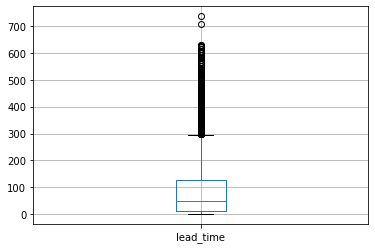

In [37]:
# select a column with outlier

hb.boxplot(column = ['lead_time'])
plt.show

In [40]:
# replace the outlier value with IQR

def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [45]:
lower_range, upper_range = remove_outlier(hb['lead_time'])
hb['lead_time'] = np.where(hb['lead_time']>upper_range,upper_range,
                           hb['lead_time'])
hb['lead_time'] = np.where(hb['lead_time']<lower_range,lower_range,
                           hb['lead_time'])

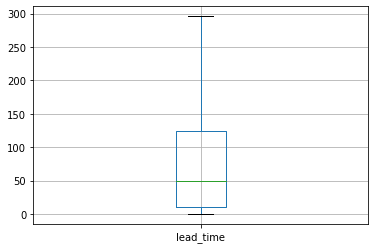

In [48]:
# boxplot after removing the outlier

hb.boxplot(column = ['lead_time'])
plt.show()

### Normalization & Scaling 

In [ ]:
Variables of data r of diff scales,i.e, age in 2 digits & income in
calues of thousands, so its difficult to compare.

Feature scaling(data normalization) = to standardize the range of 
features of data, that vary widely. It is necessary step in data 
preprocessing while using ML algos.

Here, variables with diff scales of measurement r converted into
a single scale. StandardScaler normalizes the data using formula
(x - mean)/standard deviation.

'''only for numerical variables'''

In [ ]:
Scales the data, returns the z-score of every attribute

z-score = standard score; how far frm the mean a data point is!
ranges betn -3sigma to +3sigma

its a measure of how many standard deviations below/above the 
population mean a raw score is

In [49]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [58]:
hb['is_canceled'] = std_scale.fit_transform(hb[['is_canceled']])
hb['lead_time'] = std_scale.fit_transform(hb[['lead_time']])
hb['arrival_date_year'] = std_scale.fit_transform
                          (hb[['arrival_date_year']])
hb['arrival_date_week_number'] = std_scale.fit_transform
                                 (hb[['arrival_date_week_number']])
hb['arrival_date_day_of_month'] = std_scale.fit_transform
                                  (hb[['arrival_date_day_of_month']])
hb['stays_in_weekend_nights'] = std_scale.fit_transform
                               (hb[['stays_in_weekend_nights']])
hb['stays_in_week_nights'] = std_scale.fit_transform
                            (hb[['stays_in_week_nights']])
hb['adults'] = std_scale.fit_transform(hb[['adults']])
hb['children'] = std_scale.fit_transform(hb[['children']])
hb['babies'] = std_scale.fit_transform(hb[['babies']])
hb['is_repeated_guest'] = std_scale.fit_transform
                        (hb[['is_repeated_guest']])
hb['previous_cancellations'] = std_scale.fit_transform
                            (hb[['previous_cancellations']])
hb['previous_bookings_not_canceled'] = std_scale.fit_transform
                        (hb[['previous_bookings_not_canceled']])
hb['booking_changes'] = std_scale.fit_transform
                         (hb[['booking_changes']])
hb['agent'] = std_scale.fit_transform(hb[['agent']])
# hb['company'] = std_scale.fit_transform(hb[['company']])
hb['days_in_waiting_list'] = std_scale.fit_transform
                           (hb[['days_in_waiting_list']])
hb['adr'] = std_scale.fit_transform(hb[['adr']])
# hb['required_car_parking_spaces'] = std_scale.fit_transform
#                                   (hb[['requird_car_parking_spaces']])
hb['total_of_special_requests'] = std_scale.fit_transform
                               (hb[['total_of_special_requests']]) 
hb.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
26585,Resort Hotel,-0.615833,1.389464,-0.306495,July,0.377417,1.718732,0.963743,0.182210,0.198010,...,1.001371,No Deposit,-0.635000,-0.07485,Transient,0.799998,0,1.564247,Check-Out,08-05-2016
54712,City Hotel,1.623816,0.402420,-0.306495,July,0.304281,0.926410,0.963743,-0.791651,1.794257,...,-0.373520,No Deposit,-0.681040,-0.07485,Transient,0.570015,0,-0.839768,Canceled,04-05-2016
53501,City Hotel,1.623816,-0.757357,-0.306495,June,-0.061400,0.813221,-0.974301,-0.791651,-1.398237,...,-0.373520,No Deposit,-0.681040,-0.07485,Transient,-0.206293,0,0.362239,Canceled,6/19/2016
13048,Resort Hotel,1.623816,-0.720343,1.150994,July,0.231144,1.492354,0.963743,0.182210,1.794257,...,-0.373520,No Deposit,1.445993,-0.07485,Transient,4.666085,0,-0.839768,Canceled,07-09-2017
9773,Resort Hotel,1.623816,0.636843,-0.306495,December,1.913276,1.718732,0.963743,0.669141,0.198010,...,-0.373520,No Deposit,1.445993,-0.07485,Transient,-0.698076,0,2.766254,Canceled,8/25/2016
100841,City Hotel,-0.615833,-0.263835,-0.306495,October,1.328187,1.605543,0.963743,-0.791651,0.198010,...,-0.373520,No Deposit,-0.681040,-0.07485,Transient,-0.046305,0,0.362239,Check-Out,11-02-2016
20203,Resort Hotel,-0.615833,-0.967104,-0.306495,January,-1.670396,0.360466,-0.974301,-0.791651,0.198010,...,-0.373520,No Deposit,-0.635000,-0.07485,Transient,-1.006236,1,-0.839768,Check-Out,1/20/2016
114895,City Hotel,-0.615833,0.599828,1.150994,June,-0.061400,1.152788,-0.005279,-0.791651,0.198010,...,-0.373520,No Deposit,-0.681040,-0.07485,Transient,-0.133571,0,-0.839768,Check-Out,6/28/2017
97382,City Hotel,-0.615833,-0.522934,-0.306495,September,0.816234,-0.545045,0.963743,0.182210,-1.398237,...,-0.373520,No Deposit,-0.635000,-0.07485,Transient,0.066415,0,-0.839768,Check-Out,9/16/2016
43123,City Hotel,-0.615833,-0.670991,-1.763984,September,0.816234,-0.092290,-0.974301,0.182210,0.198010,...,-0.373520,No Deposit,-0.681040,-0.07485,Transient,-0.024488,0,-0.839768,Check-Out,9/18/2015


In [59]:
hb.tail(7)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119383,City Hotel,-0.615833,1.056336,1.150994,August,0.596825,1.718732,0.963743,0.669141,0.198010,...,-0.37352,No Deposit,-0.377178,-0.07485,Transient,-0.340829,0,-0.839768,Check-Out,09-06-2017
119384,City Hotel,-0.615833,-0.708005,1.150994,August,0.596825,1.605543,0.963743,1.156072,0.198010,...,-0.37352,No Deposit,2.864015,-0.07485,Transient,-0.185567,0,1.564247,Check-Out,09-06-2017
119385,City Hotel,-0.615833,-0.683329,1.150994,August,0.596825,1.605543,0.963743,1.156072,0.198010,...,-0.37352,No Deposit,2.864015,-0.07485,Transient,-0.185567,0,-0.839768,Check-Out,09-06-2017
119386,City Hotel,-0.615833,0.291377,1.150994,August,0.596825,1.718732,0.963743,1.156072,1.794257,...,-0.37352,No Deposit,-0.681040,-0.07485,Transient,2.164991,0,1.564247,Check-Out,09-07-2017
119387,City Hotel,-0.615833,-0.547610,1.150994,August,0.596825,1.718732,0.963743,1.156072,0.198010,...,-0.37352,No Deposit,-0.681040,-0.07485,Transient,0.933807,0,3.968261,Check-Out,09-07-2017
119388,City Hotel,-0.615833,0.377744,1.150994,August,0.596825,1.718732,0.963743,1.156072,0.198010,...,-0.37352,No Deposit,0.055595,-0.07485,Transient,-0.035396,0,-0.839768,Check-Out,09-07-2017
119389,City Hotel,-0.615833,1.562196,1.150994,August,0.596825,1.492354,0.963743,2.129933,0.198010,...,-0.37352,No Deposit,-0.681040,-0.07485,Transient,0.815452,0,1.564247,Check-Out,09-07-2017


In [ ]:
go for standardmaxmin ranges bet 0 to 1

### ENCODING

In [ ]:
# for categorical values use ONE HOT ENCODING
it creates dummy variables to replace the categories in the 
categorical vaiables, represent it using 0 or 1 based on 
presence/absence of the categorical value in record.

its required bcoz ML algos. work only on numerical values

In [78]:
dummies = pd.get_dummies(hb[['hotel','arrival_date_month','meal','country'
         ,'market_segment','distribution_channel','reserved_room_type',
        'assigned_room_type','deposit_type','customer_type',
        'reservation_status','reservation_status_date']] ,
        columns = ['hotel','arrival_date_month','meal','country'
         ,'market_segment','distribution_channel','reserved_room_type',
        'assigned_room_type','deposit_type','customer_type',
        'reservation_status','reservation_status_date'])

dummies.head()

,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,...,reservation_status_date_9/26/2015,reservation_status_date_9/26/2016,reservation_status_date_9/27/2015,reservation_status_date_9/27/2016,reservation_status_date_9/28/2015,reservation_status_date_9/28/2016,reservation_status_date_9/29/2015,reservation_status_date_9/29/2016,reservation_status_date_9/30/2015,reservation_status_date_9/30/2016
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
dummies = pd.get_dummies(hb[['hotel','arrival_date_month','meal','country'
         ,'market_segment','distribution_channel','reserved_room_type',
        'assigned_room_type','deposit_type','customer_type',
        'reservation_status','reservation_status_date']] ,
        columns = ['hotel','arrival_date_month','meal','country'
         ,'market_segment','distribution_channel','reserved_room_type',
        'assigned_room_type','deposit_type','customer_type',
        'reservation_status','reservation_status_date'])

print(dummies.head())

   hotel_City Hotel  hotel_Resort Hotel  arrival_date_month_April  \
0                 0                   1                         0   
1                 0                   1                         0   
2                 0                   1                         0   
3                 0                   1                         0   
4                 0                   1                         0   

   arrival_date_month_August  arrival_date_month_December  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   

   arrival_date_month_February  arrival_date_month_January  \
0                            0                           0   
1                            0                           0   
2                            0  

In [80]:
columns = ['hotel','arrival_date_month','meal','country'
         ,'market_segment','distribution_channel','reserved_room_type',
        'assigned_room_type','deposit_type','customer_type',
        'reservation_status','reservation_status_date']
hb = pd.concat([hb, dummies], axis = 1)
hb.drop(columns, axis=1, inplace=True)
hb.sample(10)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reservation_status_date_9/26/2015,reservation_status_date_9/26/2016,reservation_status_date_9/27/2015,reservation_status_date_9/27/2016,reservation_status_date_9/28/2015,reservation_status_date_9/28/2016,reservation_status_date_9/29/2015,reservation_status_date_9/29/2016,reservation_status_date_9/30/2015,reservation_status_date_9/30/2016
29570,0,30,2016,44,28,1,2,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
61813,1,261,2016,53,26,1,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
56223,1,419,2016,36,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
45389,0,72,2015,44,28,0,3,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
81932,1,278,2016,33,11,0,1,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
50487,1,437,2016,19,2,1,2,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
48550,1,161,2016,13,25,1,2,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
12173,1,254,2017,24,16,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
50874,1,71,2016,20,10,0,3,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
83348,0,58,2016,5,27,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
hb.dtypes

is_canceled                          int64
lead_time                            int64
arrival_date_year                    int64
arrival_date_week_number             int64
arrival_date_day_of_month            int64
                                     ...  
reservation_status_date_9/28/2016    uint8
reservation_status_date_9/29/2015    uint8
reservation_status_date_9/29/2016    uint8
reservation_status_date_9/30/2015    uint8
reservation_status_date_9/30/2016    uint8
Length: 1186, dtype: object